In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
training_dir = 'Training'
testin_dir = 'Testing'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)   # Same normalization for test data

In [73]:
train_dataset = train_datagen.flow_from_directory(
    training_dir,  # Replace with your actual path to the training data
    target_size=(256, 256),     # Resize images to fit the model's input size
    batch_size=32,
    class_mode='sparse',        # Use sparse labels (integers) for multi-class classification
    shuffle=True
)

Found 3342 images belonging to 4 classes.


In [74]:
test_dataset = test_datagen.flow_from_directory(
    testin_dir,   # Replace with your actual path to the testing data
    target_size=(256, 256),     # Resize images to fit the model's input size
    batch_size=32,
    class_mode='sparse'         # Use sparse labels (integers) for multi-class classification
)

Found 1311 images belonging to 4 classes.


In [22]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))  # Input shape: 256x256 RGB images
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer (4 classes for brain tumor classification)
model.add(Dense(4, activation='softmax'))  # 4 classes: glioma, meningioma, pituitary, notumor


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [75]:
# Adjusting the model for multi-class classification
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model.add(Dense(4, activation='softmax'))  # 4 classes, softmax activation for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    58,982,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,354,500 (226.42 MB)

 Trainable params: 59,354,500 (226.42 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
history = model.fit(
    train_dataset,  # The training data
    epochs=3,       # Number of epochs (you can increase this)
)

Epoch 1/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 626s 6s/step - accuracy: 0.5994 - loss: 1.1488
Epoch 2/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 609s 6s/step - accuracy: 0.8817 - loss: 0.3775
Epoch 3/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 653s 6s/step - accuracy: 0.9270 - loss: 0.2241


In [77]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8242 - loss: 0.5532
Test Loss: 0.5823211073875427
Test Accuracy: 0.8131197690963745


In [ ]:
# Define the CNN model
model1 = Sequential()

# First Convolutional Block
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model1.add(Dense(1, activation='sigmoid'))  # Binary classification output

In [51]:
model1.compile(
    optimizer='adam',  # Optimizer for training
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']  # Metric to monitor during training
)

In [45]:
history1 = model1.fit(
    train_dataset,  # The training data
    epochs=3,       # Number of epochs (you can increase this)
)

Epoch 1/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 693s 7s/step - accuracy: 0.2057 - loss: -550780672.0000
Epoch 2/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 742s 7s/step - accuracy: 0.2318 - loss: -148520550400.0000
Epoch 3/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 739s 7s/step - accuracy: 0.1933 - loss: -3622993657856.0000


In [56]:
# Define the CNN model
model2 = Sequential()

# First Convolutional Block
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model2.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
model2.add(Dense(1, activation='sigmoid'))  # Changed from softmax to sigmoid



C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

In [58]:
history2 = model2.fit(
    train_dataset,  # The training data
    epochs=3,       # Number of epochs (you can increase this)
)

Epoch 1/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 646s 6s/step - accuracy: 0.2178 - loss: -320310656.0000
Epoch 2/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 905s 9s/step - accuracy: 0.2166 - loss: -126900305920.0000
Epoch 3/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 662s 6s/step - accuracy: 0.2066 - loss: -3462516703232.0000


In [84]:
train_dataset = train_datagen.flow_from_directory(
    training_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

test_dataset = test_datagen.flow_from_directory(
    testin_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 3342 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [85]:
from tensorflow.keras.regularizers import l2

In [86]:
# Define the CNN model for multi-class classification
model3 = Sequential()

# First Convolutional Block
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(256, 256, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model3.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model3.add(Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model3.add(Flatten())

# Fully Connected Layer
model3.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.5))

# Output Layer
model3.add(Dense(4, activation='softmax'))  # 4 classes for glioma, meningioma, notumor, pituitary



In [87]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model3.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [88]:
history3 = model3.fit(
    train_dataset,  # The training data
    epochs=3,       # Number of epochs (you can increase this)
)

Epoch 1/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 725s 7s/step - accuracy: 0.5670 - loss: 9.3202
Epoch 2/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 733s 7s/step - accuracy: 0.8628 - loss: 1.5355
Epoch 3/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 720s 7s/step - accuracy: 0.8914 - loss: 0.8301


In [89]:
test_loss, test_acc = model3.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7749 - loss: 1.1214
Test Loss: 1.1267999410629272
Test Accuracy: 0.7673531770706177


In [96]:
# Define the CNN model for multi-class classification
model4 = Sequential()

# First Convolutional Block
model4.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(256, 256, 3)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model4.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model4.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model4.add(Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model4.add(Flatten())

# Fully Connected Layer
model4.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))  # Reduced regularization strength
model4.add(Dropout(0.3))  # Reduced dropout rate

# Output Layer
model4.add(Dense(4, activation='softmax'))  # 4 classes for glioma, meningioma, notumor, pituitary

# Compile the model
model4.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
               loss='categorical_crossentropy',
               metrics=['accuracy'])


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
history4 = model4.fit(
    train_dataset,  # The training data
    epochs=3,       # Number of epochs (you can increase this)
)

Epoch 1/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 784s 7s/step - accuracy: 0.5810 - loss: 1.7787
Epoch 2/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 765s 7s/step - accuracy: 0.8395 - loss: 0.7654
Epoch 3/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 772s 7s/step - accuracy: 0.9121 - loss: 0.5514


Model 1 evaluation

In [90]:
import numpy as np

# Predict on the testing dataset
y_pred_prob = model.predict(test_dataset)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to predicted classes

# Get true labels from the generator
y_true = test_dataset.classes  # True class indices


41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 978ms/step


In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 42  61 113  84]
 [ 41  66 119  80]
 [ 66  77 161 101]
 [ 37  66 104  93]]


In [93]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Compute precision, recall, f1 score, and accuracy
precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multi-class averaging
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

In [94]:
# Print the metrics
print("\nPrecision (Macro Average):", precision)
print("Recall (Macro Average):", recall)
print("F1 Score (Macro Average):", f1)
print("Accuracy:", accuracy)


Precision (Macro Average): 0.26349277358550693
Recall (Macro Average): 0.2658042846768337
F1 Score (Macro Average): 0.2604163559529197
Accuracy: 0.2761250953470633


Model 3 Evaluation

In [98]:
import numpy as np

# Predict on the testing dataset
y_pred_prob = model4.predict(test_dataset)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to predicted classes

# Get true labels from the generator
y_true = test_dataset.classes  # True class indices


41/41 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step


In [99]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Compute precision, recall, f1 score, and accuracy
precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multi-class averaging
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

In [100]:
# Print the metrics
print("\nPrecision (Macro Average):", precision)
print("Recall (Macro Average):", recall)
print("F1 Score (Macro Average):", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:", cm)


Precision (Macro Average): 0.2501504138222888
Recall (Macro Average): 0.2539288307915759
F1 Score (Macro Average): 0.24719427745743536
Accuracy: 0.2532418001525553
Confusion Matrix: [[ 43  85  88  84]
 [ 39 109  71  87]
 [ 65 113  97 130]
 [ 48  89  80  83]]


In [117]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

In [110]:
train_dataset = train_datagen.flow_from_directory(
    training_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

test_dataset = test_datagen.flow_from_directory(
    testin_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 3342 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [111]:
# Compute class weights to handle class imbalance
class_indices = train_dataset.class_indices
num_classes = len(class_indices)


In [112]:
y_train = train_dataset.classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(num_classes)}

In [113]:
# Define the CNN model for multi-class classification
model5 = Sequential()

# First Convolutional Block
model5.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(256, 256, 3)))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model5.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model5.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Block
model5.add(Conv2D(512, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model5.add(Flatten())

# Fully Connected Layer
model5.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))  # Regularization strength
model5.add(Dropout(0.3))  # Dropout for regularization

# Output Layer
model5.add(Dense(4, activation='softmax'))  # 4 classes for glioma, meningioma, notumor, pituitary


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:

# Compile the model with a smaller learning rate
model5.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate for better convergence
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [115]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs with no improvement before stopping
    restore_best_weights=True,  # Restore the best weights once training is stopped
    verbose=1
)

In [118]:
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'best_model.keras',  # Save the model as 'best_model.keras'
    monitor='val_loss',  # Monitor validation loss to save the best model
    save_best_only=True,  # Save only the best model based on validation loss
    verbose=1
)


In [119]:
# Train the model with class weights and callbacks
history5 = model5.fit(
    train_dataset,  # The training data
    epochs=3,  # Number of epochs (you can increase this)
    class_weight=class_weight_dict,  # Include class weights to address class imbalance
    validation_data=test_dataset,  # Validate the model on the test dataset
    callbacks=[early_stopping, checkpoint]  # Include EarlyStopping and ModelCheckpoint callbacks
)

Epoch 1/3


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5193 - loss: 2.5975
Epoch 1: val_loss improved from inf to 1.08357, saving model to best_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 731s 7s/step - accuracy: 0.5207 - loss: 2.5874 - val_accuracy: 0.7315 - val_loss: 1.0836
Epoch 2/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8545 - loss: 0.7705
Epoch 2: val_loss improved from 1.08357 to 0.93643, saving model to best_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 718s 7s/step - accuracy: 0.8546 - loss: 0.7701 - val_accuracy: 0.8024 - val_loss: 0.9364
Epoch 3/3
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9211 - loss: 0.5616
Epoch 3: val_loss improved from 0.93643 to 0.86142, saving model to best_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 717s 7s/step - accuracy: 0.9211 - loss: 0.5616 - val_accuracy: 0.8330 - val_loss: 0.8614
Restoring model weights from the end of the best epoch: 3.


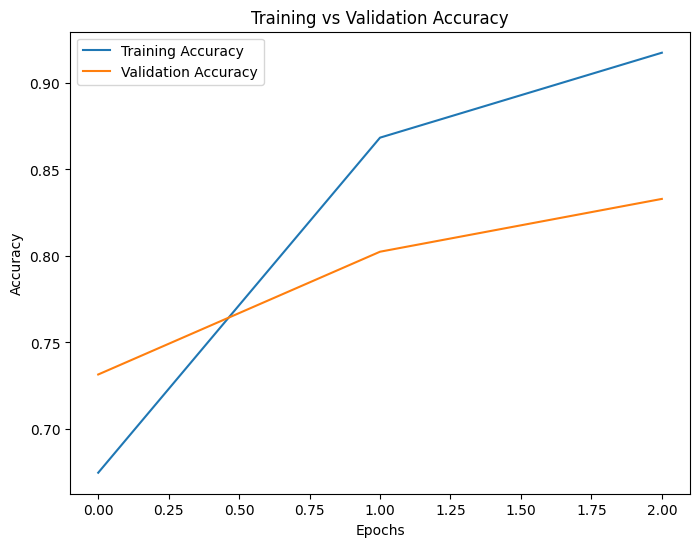

In [120]:
import matplotlib.pyplot as plt

# Assuming history5 is the history object from your model training
# Get the training and validation accuracy values
train_accuracy = history5.history['accuracy']
val_accuracy = history5.history['val_accuracy']

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')

# Add labels and title
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


In [140]:
 # Image size
image_size = (150, 150)

# Training batch size
batch_size = 32

In [142]:
SEED = 111
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")


# applying the generator to training data with constant seed
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    seed=SEED)

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# applying the generator to testing data with constant seed
test_generator = test_datagen.flow_from_directory(testin_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False,
                                                  seed=SEED)

Found 3342 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [143]:
class_indices_train = train_generator.class_indices
class_indices_train_list = list(train_generator.class_indices.keys())


# Displaying categorical types
print("Categorical types for the training data:")
print(class_indices_train)

Categorical types for the training data:
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [144]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)

# Training epochs
epochs = 40

# Steps per epoch
steps_per_epoch = train_generator.samples // batch_size

# Validation steps
validation_steps = test_generator.samples // batch_size

print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps Per Epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

Image shape: (150, 150, 3)
Epochs: 40
Batch size: 32
Steps Per Epoch: 104
Validation steps: 40


In [148]:
from tensorflow.keras import models
# Data Classifications
CLASS_TYPES = ['pituitary', 'notumor', 'meningioma', 'glioma']
N_TYPES = len(CLASS_TYPES)

In [152]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import legacy

EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

In [155]:
# Define the model architecture
model = models.Sequential([
    
    # Convolutional layer 1
    Conv2D(32, (4, 4), activation="relu", input_shape=image_shape),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 2
    Conv2D(64, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 3
    Conv2D(128, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    # Convolutional layer 4
    Conv2D(128, (4, 4), activation="relu"),
    Flatten(),

    # Full connect layers
    Dense(512, activation="relu"),
    Dropout(0.5, seed=SEED),
    Dense(N_TYPES, activation="softmax")
])

model.summary()

optimizer = Adam(learning_rate=0.001, beta_1=0.869, beta_2=0.995)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_110 (Conv2D)             │ (None, 147, 147, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_101               │ (None, 49, 49, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 46, 46, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_102               │ (None, 15, 15, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_103               │ (None, 4, 4, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 1, 1, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,972 (1.89 MB)

 Trainable params: 495,972 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=True)

# Training the model
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=validation_steps,
                    callbacks=[model_es, model_rlr])


Epoch 1/40


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 47s 416ms/step - accuracy: 0.4289 - loss: 1.1860 - val_accuracy: 0.6773 - val_loss: 0.8469 - learning_rate: 0.0010
Epoch 2/40
  1/104 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.7500 - loss: 0.5436

c:\Program Files\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7500 - loss: 0.5436 - val_accuracy: 0.9677 - val_loss: 0.3537 - learning_rate: 0.0010
Epoch 3/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 43s 403ms/step - accuracy: 0.7748 - loss: 0.5824 - val_accuracy: 0.6797 - val_loss: 0.7879 - learning_rate: 0.0010
Epoch 4/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8750 - loss: 0.4095 - val_accuracy: 0.8065 - val_loss: 0.6802 - learning_rate: 0.0010
Epoch 5/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 44s 403ms/step - accuracy: 0.8372 - loss: 0.4443 - val_accuracy: 0.7344 - val_loss: 0.7128 - learning_rate: 0.0010
Epoch 6/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.3296 - val_accuracy: 0.9032 - val_loss: 0.2550 - learning_rate: 0.0010
Epoch 7/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 43s 397ms/step - accuracy: 0.8543 - loss: 0.4042 - val_accuracy: 0.7711 - val_loss: 0.6044 - learning_rate: 0.0010
Epoch 8/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.2094 - 

In [157]:
# Evaluating the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples//batch_size)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.7637 - loss: 0.7835
Test Loss: 0.46091
Test Accuracy: 0.86094


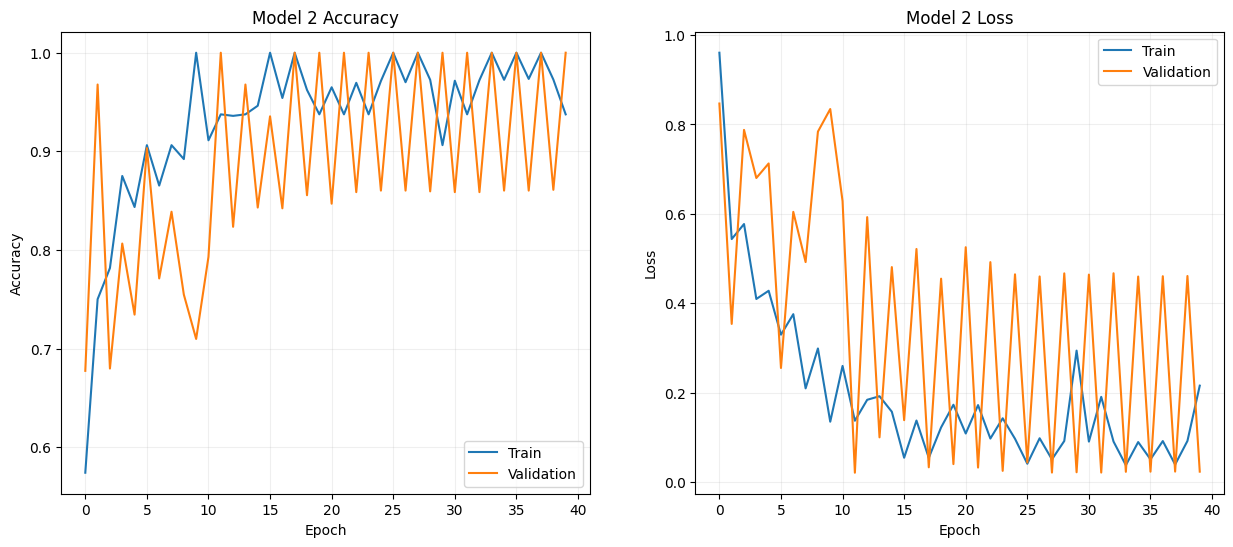

In [158]:
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plot the training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model 2 Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha=0.2)

# Plot the training and validation loss over epochs
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model 2 Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha=0.2)

plt.show()